# <center>L2 Computational Physics</center>
---
## Week 4: Differential Equations II

In this notebook, you will write a program to study the trajectory of a spherical, iron cannonball in the presence of gravity and drag forces. 

In [50]:
import numpy
from matplotlib import pyplot as plt

In [51]:
# Define all constants to be used in the simulation
r_cb = 0.15  # Radius of cannonball in m
rho_iron = 7874  # Density of iron in kg/m^3
g = 9.81  # Acceleration due to gravity in m/s^2
kappa = 0.47  # Drag coefficient of a sphere
rho_air = 1.23  # Density of air in kg/m^3
v0 = 125.00  # Initial speed in m/s

From this information, calculate the following two variables:

In [52]:
def get_area(r):
    ''' 
    This function returns the cross section area of a sphere of radius r. The returned 
    value is in the squared units of the unit of the radius argument.
    '''
    return numpy.pi*(r**2);

def get_mass(r):
    ''' 
    This function returns the mass of an iron sphere of radius r. The radius 
    should be given in meter and the return value is in kg.
    '''
    return (4*numpy.pi*(r**3)*rho_iron)/3;

area_cb = get_area(r_cb)
mass_cb = get_mass(r_cb)

In [53]:
# these tests are worth one mark
assert numpy.isclose(area_cb, 0.07068583470577035)
assert numpy.isclose(mass_cb, 111.31605249464711)

## The Differential Equations

Create a function `f` which calculates the right-hand side of the differential equation

$$ \frac{d}{dt}\left(\begin{array}{c}x\\y\\v_x \\v_y \end{array}\right) = f(x, y, v_x, v_y, t)$$

such that the differential equation represents the cannonball's motion as it moves through the air. 

- *Your function should accept two arguments:*
    - `r` *- a numpy array representing the cannonball's state, $(x, y, v_{x}, v_{y})$.*
    - `t` *- Time * 
    
- *The drag force experienced by the cannonball is given by $$\vec{F}_{\textrm{d}} = - \frac{1}{2} C_{\textrm{d}} \rho |\vec{v}|^{2} A \widehat{v}~,$$ where $\widehat{v}$ is a unit vector pointing in the direction of the cannonball's instantaneous velocity.*

In [54]:
def f(r, t):
    '''Implements differential equation for cannonball from state vector r and time t'''
    
    # Unpack array of the state
    x = r[0]
    y = r[1]
    vx = r[2]
    vy = r[3]
    
    # these variables should updated in your code to be the derivatives of 
    # the x, y positions and the derivative of the x, y velocities. 
    dx_dt = vx
    dy_dt = vy
    vsq = ((vx**2) + (vy**2))**0.5
    dvx_dt = ((-kappa)*rho_air*vsq*area_cb*vx)/(2*mass_cb)
    dvy_dt = -g + ((-kappa)*rho_air*vsq*area_cb*vy)/(2*mass_cb)
    
    # YOUR CODE HERE
    return numpy.array([dx_dt, dy_dt, dvx_dt, dvy_dt])
print(f([88.38834765, 88.38834765, -2.0279283, -11.8379283], 0))

[-2.02792830e+00 -1.18379283e+01  4.47050545e-03 -9.78390365e+00]


Check your result:

In [55]:
r_test = [0, 0, 88.38834764831843, 88.38834764831843]
assert len(f(r_test, 0))== 4

In [56]:
r_test = [0, 0, 88.38834764831843, 88.38834764831843]
assert numpy.isclose(f(r_test, 0), [ 88.38834765,  88.38834765,  -2.0279283 , -11.8379283 ]).all()

## Solving the Differential Equations

Create the function `solve_euler(state_initial, t1, n_panels)` which solves the differential equations using Euler's method.

- `state_initial` *is a numpy array containing the initial conditions $(x_{0}, y_{0}, v_{x0}, v_{y0})$*
- *When working with a numpy array, you can use the same commands as those used for single variables - for instance,* `state += f(state, t)`.
- *This function should record all state values at each timepoint in the variable `history` and return it. This will be similar to last week, only this time you will have to populate a 2D array.* 


In [62]:
def solve_euler(state_initial, t1, n_steps):
    '''Solves ODE using Euler's method from state_initial to end time t1 using n_panels panels'''
    # Define array for trajectory history
    history = numpy.empty((n_steps+1,4))  # Number of columns is equal to number of variables to solve for (4)
    history[0] = state_initial
    dt = t1/(n_steps)
    for i in range(1, n_steps+1):
        acceleration = f([history[i-1, 0], history[i-1, 1], history[i-1, 2], history[i-1, 3]], 0)
        history[i,0] = history[i-1, 0] + (history[i-1, 2]*dt)
        history[i,1] = history[i-1, 1] + (history[i-1, 3]*dt)
        history[i,2] = history[i-1, 2] + (dt*acceleration[2])
        print(history[i,2])
        history[i,3] = history[i-1, 3] + (dt*acceleration[3])
    return history

Test your solution:

In [64]:
# this test is worth 4 marks
r_test = [0, 0, 88.38834764831843, 88.38834764831843]
assert numpy.isclose(solve_euler(r_test, 25.0, 10), numpy.array(
    [[   0.        ,    0.        ,   88.38834765,   88.38834765],
     [ 220.97086912,  220.97086912,   83.3185269 ,   58.7935269 ],
     [ 429.26718637,  367.95468637,   79.41984538,   31.51743125],
     [ 627.81679983,  446.7482645 ,   76.30595276,    5.75669607],
     [ 818.58168171,  461.14000469,   73.62655732,  -18.97044366],
     [1002.64807501,  413.71389553,   71.05785323,  -42.83359748],
     [1180.2927081 ,  306.62990184,   68.35253688,  -65.72783569],
     [1351.1740503 ,  142.31031262,   65.37829955,  -87.3928075 ],
     [1514.61979917,  -76.17170612,   62.10406078, -107.54105068],
     [1669.87995113, -345.02433282,   58.56508321, -125.93786257],
     [1816.29265915, -659.86898925,   54.83262575, -142.43661744]])).all()

83.31852689970225
79.41984538205064
76.3059527557027
73.62655731998245
71.05785323249769
68.35253688009419
65.37829955149601
62.104060782558825
58.565083209457946
54.83262575491391


## Finding the range

To find the range of the projectile we will look for the $x$ coordinate when the trajectory crosses the $y=0$ line. In most cases that point will not be one of the steps but will be between two steps. We will use a linear approximation to determine this point given the last point with a positive $y$ value and the first point with a negative $y$ value. Implement the function `find_zero_linear` that takes as argument the two values of $x$ `x1` and `x2` and the heights `y1` and `y2` and returns the value of $x$ at which the line between $(x_1,y_1)$ and $x_2,y_2$ crosses the $y=0$ line.  

In [108]:
def find_zero_linear(x1, x2, y1, y2):
    x0 = 0
    m = 0
    c = 0
    if y1*y2 < 0:
        m = (y2 - y1)/(x2 - x1)
        c = y1 - (m*x1)
        x0 = (-1)*(c/m)
    return x0;

In [109]:
# these tests are worth 2 marks
assert numpy.isclose(find_zero_linear(-1,1,3,-3),0.0)
assert numpy.isclose(find_zero_linear(-1,1,1,-3), -0.5)

Given the function above we can define a function to determine the range. (Don't modify it!)

In [110]:
def find_range(history):
    all_xs = history[:,0]
    all_ys = history[:,1]
    negatives = numpy.argwhere(all_ys<0)
    if len(negatives) == 0 :
        print ("The projectile did not touch down! Returning the last known location")
        return all_xs[-1]
    (index,) = negatives[0]
    y1, y2 = all_ys[index-1], all_ys[index]
    x1, x2 = all_xs[index -1], all_xs[index]
    return find_zero_linear(x1,x2,y1,y2)

In [111]:
r_test = [0, 0, 88.38834764831843, 88.38834764831843]
h = solve_euler(r_test, 25.0, 10000)
assert numpy.isclose(find_range(h),1306.2541)

88.38327782756981
88.37820929166803
88.37314204021374
88.3680760728077
88.36301138905077
88.35794798854391
88.3528858708882
88.3478250356848
88.342765482535
88.33770721104017
88.33265022080178
88.32759451142142
88.32254008250078
88.31748693364163
88.31243506444586
88.30738447451547
88.30233516345254
88.29728713085927
88.29224037633796
88.287194899491
88.28215069992089
88.27710777723024
88.27206613102175
88.2670257608982
88.26198666646253
88.25694884731773
88.2519123030669
88.24687703331327
88.24184303766012
88.23681031571088
88.23177886706907
88.22674869133829
88.22171978812224
88.21669215702475
88.21166579764974
88.20664070960122
88.2016168924833
88.1965943459002
88.19157306945623
88.1865530627558
88.18153432540345
88.17651685700378
88.1715006571615
88.16648572548144
88.1614720615685
88.15645966502771
88.15144853546418
88.14643867248313
88.14143007568987
88.13642274468981
88.13141667908846
88.12641187849144
88.12140834250445
88.11640607073332
88.11140506278394
88.10640531826233
88.101

80.46384890996246
80.46061711699325
80.45738593992984
80.45415537845493
80.45092543225122
80.44769610100143
80.44446738438825
80.44123928209439
80.43801179380256
80.43478491919547
80.43155865795582
80.42833300976632
80.42510797430968
80.42188355126864
80.41865974032586
80.4154365411641
80.41221395346605
80.40899197691444
80.40577061119198
80.40254985598139
80.39932971096539
80.39611017582669
80.39289125024803
80.38967293391211
80.38645522650167
80.38323812769941
80.38002163718808
80.37680575465039
80.37359047976908
80.37037581222687
80.36716175170648
80.36394829789064
80.36073545046209
80.35752320910355
80.35431157349775
80.35110054332743
80.34789011827533
80.34468029802416
80.34147108225667
80.3382624706556
80.33505446290366
80.3318470586836
80.32864025767817
80.3254340595701
80.32222846404213
80.319023470777
80.31581907945744
80.3126152897662
80.30941210138602
80.30620951399963
80.3030075272898
80.29980614093924
80.29660535463071
80.29340516804696
80.29020558087072
80.28700659278475


76.13109441858293
76.12843247760637
76.12577068650202
76.12310904498148
76.12044755275636
76.11778620953837
76.11512501503924
76.1124639689708
76.10980307104494
76.10714232097357
76.1044817184687
76.10182126324241
76.09916095500681
76.09650079347406
76.09384077835644
76.09118090936624
76.08852118621584
76.08586160861768
76.08320217628423
76.08054288892806
76.07788374626179
76.07522474799809
76.07256589384971
76.06990718352947
76.06724861675022
76.06459019322489
76.06193191266648
76.05927377478804
76.0566157793027
76.05395792592364
76.05130021436409
76.04864264433736
76.04598521555684
76.04332792773594
76.04067078058817
76.03801377382709
76.03535690716632
76.03270018031955
76.03004359300054
76.0273871449231
76.0247308358011
76.02207466534847
76.01941863327923
76.01676273930745
76.01410698314727
76.01145136451288
76.00879588311855
76.0061405386786
76.00348533090741
76.00083025951945
75.99817532422922
75.99552052475133
75.9928658608004
75.99021133209118
75.98755693833841
75.98490267925695

72.16443889471955
72.16172524287306
72.15901141020248
72.15629739656879
72.15358320183306
72.15086882585649
72.14815426850038
72.14543952962615
72.14272460909531
72.14000950676953
72.13729422251056
72.13457875618029
72.1318631076407
72.12914727675388
72.12643126338206
72.12371506738756
72.12099868863284
72.11828212698045
72.11556538229306
72.11284845443345
72.11013134326453
72.1074140486493
72.10469657045091
72.10197890853259
72.09926106275768
72.09654303298966
72.09382481909212
72.09110642092875
72.08838783836336
72.08566907125987
72.08295011948233
72.08023098289489
72.0775116613618
72.07479215474744
72.07207246291632
72.06935258573304
72.06663252306231
72.06391227476897
72.06119184071795
72.05847122077434
72.05575041480328
72.0530294226701
72.05030824424016
72.047586879379
72.04486532795224
72.04214358982561
72.03942166486499
72.03669955293633
72.03397725390572
72.03125476763935
72.02853209400354
72.02580923286469
72.02308618408935
72.02036294754417
72.01763952309591
72.0149159106114

66.25963862935419
66.25641944368422
66.25319998920016
66.24998026593009
66.24676027390217
66.2435400131446
66.2403194836856
66.23709868555348
66.23387761877657
66.23065628338328
66.22743467940204
66.22421280686133
66.2209906657897
66.21776825621572
66.21454557816804
66.21132263167533
66.20809941676633
66.20487593346982
66.20165218181462
66.19842816182963
66.19520387354375
66.19197931698596
66.1887544921853
66.1855293991708
66.18230403797162
66.17907840861692
66.1758525111359
66.17262634555784
66.16939991191205
66.16617321022788
66.16294624053475
66.15971900286212
66.15649149723949
66.15326372369641
66.1500356822625
66.14680737296739
66.14357879584078
66.14034995091242
66.1371208382121
66.13389145776966
66.130661809615
66.12743189377805
66.12420171028879
66.12097125917725
66.11774054047353
66.11450955420774
66.11127830041008
66.10804677911075
66.10481499034003
66.10158293412823
66.09835061050573
66.09511801950293
66.09188516115032
66.08865203547838
66.08541864251767
66.0821849822988
66.

61.15649852833144
61.15292954831273
61.149360381418006
61.14579102771975
61.142221487290456
61.13865176020263
61.13508184652879
61.13151174634148
61.12794145971324
61.124370986716634
61.120800327424234
61.11722948190864
61.11365845024244
61.11008723249826
61.10651582874873
61.10294423906648
61.09937246352418
61.09580050219451
61.092228355150134
61.08865602246376
61.0850835042081
61.081510800455874
61.077937911279825
61.0743648367527
61.070791576947265
61.0672181319363
61.063644501792595
61.06007068658896
61.056496686398205
61.05292250129317
61.04934813134669
61.04577357663163
61.042198837220866
61.03862391318727
61.035048804603754
61.03147351154322
61.027898034078596
61.02432237228282
61.02074652622884
61.017170495989625
61.01359428163815
61.01001788324741
61.006441300890394
61.00286453464013
60.99928758456965
60.99571045075199
60.99213313326022
60.98855563216739
60.98497794754659
60.981400079470916
60.97782202801347
60.97424379324738
60.97066537524578
60.967086774081814
60.96350798982

55.63556314575008
55.63179995939332
55.62803670233501
55.62427337465311
55.62050997642556
55.616746507730305
55.612982968645284
55.60921935924843
55.60545567961767
55.60169192983093
55.597928109966126
55.594164220101185
55.59040026031401
55.58663623068252
55.58287213128461
55.57910796219818
55.57534372350113
55.571579415271344
55.56781503758671
55.56405059052511
55.560286074164424
55.55652148858252
55.552756833857266
55.548992110066536
55.54522731728818
55.54146245560006
55.53769752508003
55.53393252580592
55.53016745785559
55.52640232130687
55.52263711623759
55.51887184272558
55.51510650084867
55.511341090684674
55.50757561231141
55.5038100658067
55.50004445124833
55.49627876871411
55.49251301828184
55.488747200029316
55.48498131403432
55.48121536037464
55.47744933912805


## Plotting task

Create a plot to show the trajectories for different values of the initial angle. Use the same velocity $v0=125\rm{m/s}$ for all angles. The plot should have axis labels and a title. [4 marks]


87.77996915848449
87.18990971042601
86.61748548632865
86.06203207876524
85.52290258444094
84.99946577895712
84.49110436943505
83.99721332354007
83.51719827525274
83.05047400965125
82.5964630309906
82.15459422047006
81.7243015922293
81.30502315824646
80.89619991483868
80.49727496527414
80.1076927944495
79.72689871249996
79.35433848440462
78.9894581619352
78.63170413249458
78.28052339636241
77.93536407953445
77.59567618372938
77.26091256838185
76.93053015181525
76.60399131069785
76.28076544885197
75.96033069909606
75.64217571565948
75.32580151036079
75.01072328360091
74.6964722015175
74.38259707338624
74.06866588831893
73.75426717708513
73.43901117291962
73.12253075384872
72.8044821577549
72.48454546955362
72.1624248870439
71.83784877792661
71.51056954501423
71.18036331976995
70.84702950610172
70.51039019696289
70.17028948598038
69.82659269526519
69.47918553897179
69.12797324025486
68.77287961718716
68.4138461510793
68.05083104857961
67.68380830699662
67.31276679052111
66.93770932345218


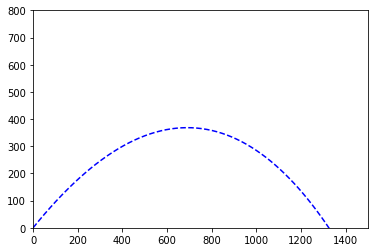

In [112]:
n_steps = 1000
thetas = range(5, 90, 5) # the angles in degrees

initial_conditions = [0, 0, 88.38834764831843, 88.38834764831843]
i
values_euler = solve_euler(initial_conditions, 300, n_steps)
xs_euler, ys_euler = values_euler[:,0], values_euler[:,1]
plt.plot(xs_euler, ys_euler, color='blue', linestyle='--')
plt.xlim(0,1500)
plt.ylim(0,800);
plt.show()

Create a plot to show the range for different values of the initial velocity. Use the same angle $\theta=60^\circ$ for all velocities. The plot should have axis labels and a title and legend. Produce one curve with and one curve without the effect of air resistance. [5 marks]


In [ ]:
n_steps = 1000
max_time = 300
v0s = numpy.linspace(50, 1000, 20)

ranges = []
ranges_noresistance = []
theta = numpy.deg2rad(60)

# Your code here
